In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
!pip install tensorflow==2.5

     |████████████████████████████████| 454.3 MB 16 kB/s 
     |████████████████████████████████| 4.0 MB 45.3 MB/s 
     |████████████████████████████████| 1.2 MB 20.6 MB/s 
     |████████████████████████████████| 462 kB 60.6 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68722 sha256=9b8665dbb76ad352944a6211b7a076a02a4f69347c5eec34230327fc3a843050
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Suc

In [3]:
!pip install keras==2.4.3

  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


In [4]:
dataset = pd.read_csv('sample_data/data_CKD_MI.csv')

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
dataset.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,138.672705,3.728215,15.4,44.0,7800.0,5.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,151.688303,18.0,0.8,130.739113,3.874993,11.3,38.0,6000.0,4.120922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,132.762387,4.944903,9.6,31.0,7500.0,3.265641,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,133.960632,3.462571,11.6,35.0,7300.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:
dataset=dataset[['sg', 'al', 'hemo', 'pcv', 'htn', 'dm','class']]#lasso

In [8]:
#dataset=dataset.drop(['age','bp','sg','al','su','bgr','wc','appet','pe','ane'],1)#rfe

In [9]:
  #dataset=dataset[['htn',	'sg',	'rbc','dm','rc','al','appet','pe','ane', 'pc','bp','class']]#cfs

In [10]:
dataset

,sg,al,hemo,pcv,htn,dm,class
0,1.020,1.0,15.4,44.0,1.0,1.0,1.0
1,1.020,4.0,11.3,38.0,0.0,0.0,1.0
2,1.010,2.0,9.6,31.0,0.0,1.0,1.0
3,1.005,4.0,11.2,32.0,1.0,0.0,1.0
4,1.010,2.0,11.6,35.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
395,1.020,0.0,15.7,47.0,0.0,0.0,0.0
396,1.025,0.0,16.5,54.0,0.0,0.0,0.0
397,1.020,0.0,15.8,49.0,0.0,0.0,0.0
398,1.025,0.0,14.2,51.0,0.0,0.0,0.0


In [11]:
#dataset.shape

In [12]:
#dataset[['htn','dm','cad','pe','ane']]=dataset[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
#dataset[['rbc','pc']] = dataset[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
#dataset[['pcc','ba']] = dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
#dataset[['appet']] = dataset[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
#dataset['classification']=dataset['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
#dataset.rename(columns={'classification':'class'},inplace=True)

In [13]:
# # Further cleaning
# dataset['pe'] = dataset['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
# dataset['appet'] = dataset['appet'].replace(to_replace='no',value=0)
# dataset['cad'] = dataset['cad'].replace(to_replace='\tno',value=0)
# dataset['dm'] = dataset['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
# dataset.drop('id',axis=1,inplace=True)

In [14]:
#dataset.head()

In [15]:
# '?' character remove process in the dataset
#for i in ['rc','wc','pcv']:
    #dataset[i] = dataset[i].str.extract('(\d+)').astype(float)

In [16]:
# Filling missing numeric data in the dataset with mean
#for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    #dataset[i].fillna(dataset[i].mean(),inplace=True)

In [17]:
#dataset.isnull().sum()

In [18]:
#dataset = dataset.dropna(axis=1)

In [19]:
dataset.head()

,sg,al,hemo,pcv,htn,dm,class
0,1.020,1.0,15.4,44.0,1.0,1.0,1.0
1,1.020,4.0,11.3,38.0,0.0,0.0,1.0
2,1.010,2.0,9.6,31.0,0.0,1.0,1.0
3,1.005,4.0,11.2,32.0,1.0,0.0,1.0
4,1.010,2.0,11.6,35.0,0.0,0.0,1.0


In [20]:
dataset.shape

(400, 7)

In [21]:
#dataset.isnull().sum()

In [22]:
#dataset.head()

In [23]:
#dataset=dataset.drop('class',1)

In [24]:
#dataset.iloc[:,:-1]

In [25]:
dataset.iloc[:,-1]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: float64

In [26]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [27]:
X

array([[ 1.02 ,  1.   , 15.4  , 44.   ,  1.   ,  1.   ],
       [ 1.02 ,  4.   , 11.3  , 38.   ,  0.   ,  0.   ],
       [ 1.01 ,  2.   ,  9.6  , 31.   ,  0.   ,  1.   ],
       ...,
       [ 1.02 ,  0.   , 15.8  , 49.   ,  0.   ,  0.   ],
       [ 1.025,  0.   , 14.2  , 51.   ,  0.   ,  0.   ],
       [ 1.025,  0.   , 15.8  , 53.   ,  0.   ,  0.   ]])

In [28]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [29]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
X_train.shape

(320, 6)

In [32]:
scaler = MinMaxScaler()

In [33]:
X_test.shape

(80, 6)

In [34]:
y_test.shape

(80,)

In [35]:
y_test

array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [36]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

In [37]:
# # Reshaping X_train for efficient modelling
# X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [38]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [39]:
import time
start_time = time.time()
#build the model
# sequential
#3 layers firtst 2 nurons and relu function
#output layer 10 nuron softmax function
model = Sequential()
model.add(keras.layers.Dense (15,input_shape=(X_train.shape[1],),activation='relu')) #input layer
model.add(keras.layers.Dense (10,activation='relu')) #hidden
model.add(keras.layers.Dense (1,activation='sigmoid')) #output
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=200,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/200
10/10 [==============================] - 1s 22ms/step - loss: 0.8213 - accuracy: 0.3812 - val_loss: 0.8138 - val_accuracy: 0.3500
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 0.7632 - accuracy: 0.3812 - val_loss: 0.7604 - val_accuracy: 0.3500
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.7244 - accuracy: 0.3812 - val_loss: 0.7249 - val_accuracy: 0.3500
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6990 - accuracy: 0.3906 - val_loss: 0.6962 - val_accuracy: 0.3875
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6765 - accuracy: 0.4500 - val_loss: 0.6725 - val_accuracy: 0.4625
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.5656 - val_loss: 0.6528 - val_accuracy: 0.7125
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.6384 - accuracy: 0.7375 - val_loss: 0.6362 - val_accuracy: 0.7500
Epoch 8/200


In [40]:
 from keras.utils.vis_utils import plot_model
 #plot_model(model, to_file='model_plot_ann_lasso.png')

In [41]:
#  from google.colab import files
#  #files.download('model_plot_ann_lasso.png') 

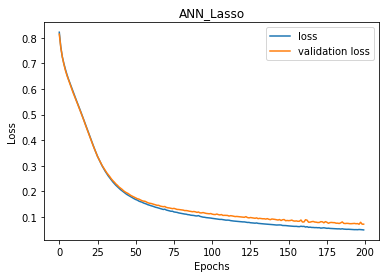

In [42]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('ANN_Lasso')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('ANN_Lasso.png', dpi=100)

In [43]:
# from google.colab import files
# files.download('ANN_Lasso.png') 

In [44]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        28
         1.0       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [47]:
print(confusion_matrix(y_test,predictions))

[[28  0]
 [ 2 50]]


In [48]:
cnf_matrix = [[28, 0],[3, 49]]

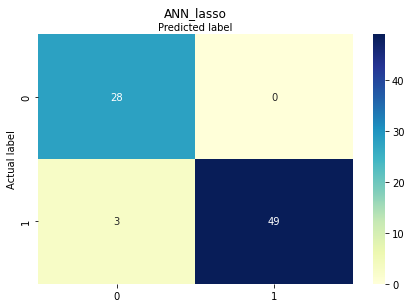

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('ANN_lasso', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('ANN_lasso_Matrix.png')
plt.show()

In [66]:
from sklearn.metrics import accuracy_score
first = 0
second = 50
prediction_accuracy = []
for i in range(8):
  X_test_ = dataset.iloc[first:second,:-1].values
  print(X_test_)
  y_true = dataset.iloc[first:second,-1].values
  y_true
  X_test_  = scaler.transform(X_test_)

  y_pred = model.predict_classes(X_test_)
  accuracy = accuracy_score(y_true, y_pred)
  prediction_accuracy.append(accuracy)

  first = second
  second = second+50
prediction_accuracy

[[ 1.02        1.         15.4        44.          1.          1.        ]
 [ 1.02        4.         11.3        38.          0.          0.        ]
 [ 1.01        2.          9.6        31.          0.          1.        ]
 [ 1.005       4.         11.2        32.          1.          0.        ]
 [ 1.01        2.         11.6        35.          0.          0.        ]
 [ 1.015       3.         12.2        39.          1.          1.        ]
 [ 1.01        0.         12.4        36.          0.          0.        ]
 [ 1.015       2.         12.4        44.          0.          1.        ]
 [ 1.015       3.         10.8        33.          1.          1.        ]
 [ 1.02        2.          9.5        29.          1.          1.        ]
 [ 1.01        2.          9.4        28.          1.          1.        ]
 [ 1.01        3.         10.8        32.          1.          1.        ]
 [ 1.015       3.          9.7        28.          1.          1.        ]
 [ 1.01447292  1.61962852

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

[[ 1.025       1.         12.         37.          1.          1.        ]
 [ 1.0113324   2.00557816  7.9        21.          1.          1.        ]
 [ 1.01276973  1.95672291  8.         24.          0.          1.        ]
 [ 1.01166563  1.86181895  8.5        27.4223888   1.          1.        ]
 [ 1.01        4.          8.8        31.          1.          1.        ]
 [ 1.01765628  0.72219915 12.6        43.          1.          1.        ]
 [ 1.01        1.         13.8        41.          1.          0.        ]
 [ 1.01        0.         12.         41.          1.          1.        ]
 [ 1.0148236   1.45497328 12.3        41.          1.          1.        ]
 [ 1.02        0.         11.5        37.23728483  0.          0.        ]
 [ 1.015       4.          7.3        20.          1.          1.        ]
 [ 1.015       0.         12.63061279 37.81034891  0.          0.        ]
 [ 1.015       3.         10.9        31.          1.          1.        ]
 [ 1.01        3.        

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

[1.0, 0.98, 0.96, 0.98, 0.98, 1.0, 1.0, 1.0]

In [51]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9807692307692308

Text(0.5, 0, 'False Positive Rate')

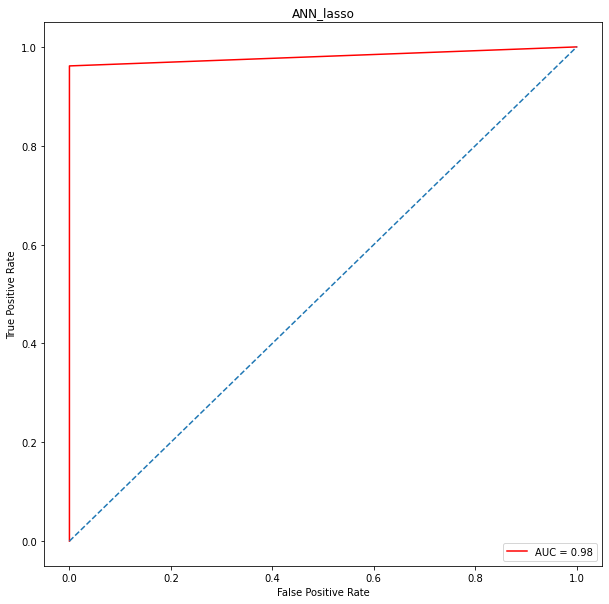

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ANN_lasso')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [53]:
data = {
    'ANN_false': false_positive_rate,
    'ANN_true': true_positive_rate,
    'ANN_prediction_accuracy': prediction_accuracy
  }

In [54]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()

In [55]:
df.to_csv('ann_Lasso_output.csv', index=False)

In [56]:
# from google.colab import files
# files.download('ann_Lasso_output.csv') 